In [2]:
import pandas as pd
import numpy as np
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
columns_names=['user_id','item_id','rating','timestamp']
#to add columns to the data we're about to input

In [5]:
df=pd.read_csv('u.data',sep='\t',names=columns_names)
#in the file separator is a "tab space"

In [6]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [7]:
#no. of unique users,movies

In [8]:
df['user_id'].nunique()

943

In [9]:
df['item_id'].nunique()

1682

In [10]:
#to add movie names,we will input another file and merge these datas using 'item_id'
#this file has separatos as ' | '

In [11]:
movie_titles=pd.read_csv('u.item',sep='\|',header=None,encoding='ISO-8859-1')

In [12]:
movie_titles.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [13]:
movie_titles=movie_titles[[0,1]]

In [14]:
movie_titles.head()

,0,1
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [15]:
movie_titles.columns=['item_id','title']

In [16]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [17]:
df=pd.merge(df,movie_titles,on='item_id')

In [18]:
df.tail()

,user_id,item_id,rating,timestamp,title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


In [19]:
#exploratory data analysis
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
plt.style.use("dark_background")
sns.set_style('dark')

In [21]:
#df ->group by title ->then taking mean() of all columns ->picking 'rating' column of all
ratings=pd.DataFrame(df.groupby('title').mean()['rating'])

In [22]:
#add column 'no of ratings' to ratings dataframe
#then taking out count of 'df' and extracting 'ratings' column.
#it tells how many number of times this movie has been rated
ratings['no of ratings']=pd.DataFrame(df.groupby('title').count()['rating'])

In [23]:
ratings.tail()

,rating,no of ratings
title,,
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6
unknown,3.444444,9
Á köldum klaka (Cold Fever) (1994),3.000000,1


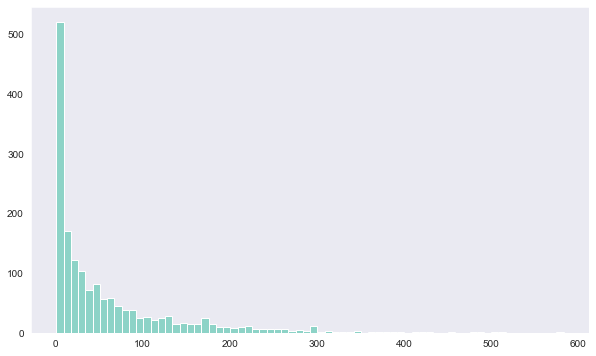

In [24]:
#plotting histogram of no of ratings

plt.figure(figsize=(10,6))
plt.hist(ratings['no of ratings'],bins=70)
plt.show()

In [25]:
#as can be seen, many movies has been rated by less no of people around 10-30 pepl.

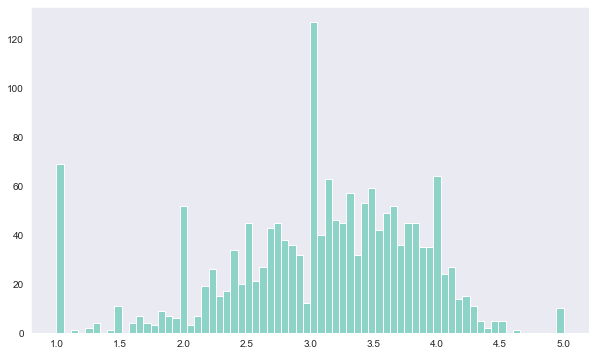

In [26]:
#plotting histogram of ratings

plt.figure(figsize=(10,6))
plt.hist(ratings['rating'],bins=70)
plt.show()

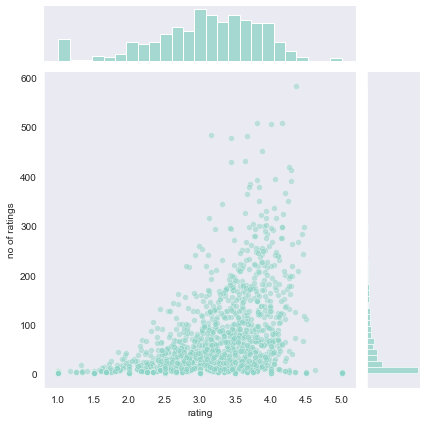

In [27]:
#to see how no of rating is connected with ratings we will plot a joint plot
sns.jointplot(x='rating',y='no of ratings',data=ratings,alpha=0.5)

In [28]:
#top right corner -> 500 pepl rated it 5 stars ->actually good
#nottom right corner -> 5 pepl ratef it 5 stars -> maybe not that good

##Creating movie recommendations

In [30]:
#creating a movie matrix using pivottable

In [35]:
moviemat=df.pivot_table(index='user_id',columns='title',values='rating')

In [36]:
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
ratings.sort_values('no of ratings',ascending=False)

,rating,no of ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


In [46]:
#so we'll choose Star Wars as reference,gathering starwars data from moviemat
starwars_user_rating=moviemat['Star Wars (1977)']

In [47]:
starwars_user_rating

user_id
1      5.0
2      5.0
3      NaN
4      5.0
5      4.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 943, dtype: float64

In [64]:
#we'll use this data to correlate with entitre movie matrix
similar_to_starwars=moviemat.corrwith(starwars_user_rating)

In [65]:
similar_to_starwars

#corr goes from -1 to +1 tellinghow correlated the object is with StarWars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [66]:
#converting it to a dataframe
corr_starwars=pd.DataFrame(similar_to_starwars,columns=['Correlation'])
#dropping 'Nan' values from df. 'inplace=True' actually applies changes.
corr_starwars.dropna(inplace=True)

In [67]:
corr_starwars.sort_values('Correlation',ascending=False)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
...,...
Roseanna's Grave (For Roseanna) (1997),-1.0
For Ever Mozart (1996),-1.0
American Dream (1990),-1.0


In [68]:
#1 means pefect correlation.But, Lets say 'Hollow Reed' has 10 reviewers 
#and all these 10 also reviewed StarWars thats why its showig +1 correlation. But its not logical,
#as Star Wars has 580 reviews, so to make data more accurate we  will put a threshold of <100 reiviews.

corr_starwars=corr_starwars.merge(ratings['no of ratings'],on='title')
corr_starwars.head()

,Correlation,no of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [73]:
corr_starwars[corr_starwars['no of ratings']>100].sort_values('Correlation',ascending=False)

##HERES THE FINAL RESULT

,Correlation,no of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


#Making an actual function

In [74]:
def recom_movies(movie_name):
    movie_user_rating=moviemat[movie_name]
    similar_to_movie=moviemat.corrwith(movie_user_rating)
   
    corr_movie=pd.DataFrame(similar_to_movie,columns=['Correlation'])
    corr_movie.dropna(inplace=True)
    
    corr_movie=corr_movie.merge(ratings['no of ratings'],on='title')
    recom=corr_movie[corr_movie['no of ratings']>100].sort_values('Correlation',ascending=False)
    
    return recom

#Enter Movie Name Below (in place of titanic)

In [77]:

recomm=recom_movies('Titanic (1997)')
recomm.head()

,Correlation,no of ratings
title,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208
